# Abalone Sex Classification — Final ML Project

## Abstract
This project uses the UCI Abalone dataset (4177 samples, 9 features) to classify abalone sex (Male, Female, Infant) using PyCaret's classification module. After preprocessing and feature selection, multiple models were evaluated using cross-validated accuracy. The best model achieved moderate accuracy due to the dataset's class overlap. The final trained model, evaluation plots, predictions, and comparison tables were saved for review.


## 1. Importing Required Libraries

In [1]:
from pycaret.classification import *
import pandas as pd

In [2]:
import os
os.getcwd()

'/Users/parmidachoubsaz/ML_Final_Project_Abalone'

In [3]:
os.listdir()

['model_results.csv',
 'abalone_sex_classification.ipynb',
 'predictions.csv',
 'logs.log',
 'abalone.names',
 '.ipynb_checkpoints',
 'abalone.data',
 'abalone_sex_classifier.pkl',
 'plots']

In [4]:
df = pd.read_csv("abalone.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.columns = [
    'Sex','Length','Diameter','Height',
    'WholeWeight','ShuckedWeight','VisceraWeight','ShellWeight','Rings'
]

df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.shape

(4177, 9)

In [7]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [9]:
sex_map = {'M': 0, 'F': 1, 'I': 2} 
df_corr = df.copy()
df_corr['Sex_num'] = df_corr['Sex'].map(sex_map)

# Compute correlation matrix
corr_matrix = df_corr.corr(numeric_only=True)
corr_matrix

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_num
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.448765
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.458245
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.417928
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.461238
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.440927
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.454658
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.445549
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.351822
Sex_num,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822,1.000000


## 2. Feature Engineering and Feature Selection
A correlation matrix was computed to understand feature relationships. Following published analyses on this dataset, features with the lowest correlation to the target (“Height” and “Rings”) were removed. The final dataset used for model training contains 7 features and 4057 samples.


In [10]:
#  Correlation between encoded target and other features
target_corr = corr_matrix['Sex_num'].drop('Sex_num')
print("Correlation of features with Sex_num:")
print(target_corr)

#  Average absolute correlation
avg_abs_corr = target_corr.abs().mean()
print("\nAverage absolute correlation:", avg_abs_corr)

#  Features below the average absolute correlation
low_corr_features = target_corr[ target_corr.abs() < avg_abs_corr ].index.tolist()
print("\nFeatures to drop based on this rule:", low_corr_features)

Correlation of features with Sex_num:
Length          -0.448765
Diameter        -0.458245
Height          -0.417928
WholeWeight     -0.461238
ShuckedWeight   -0.440927
VisceraWeight   -0.454658
ShellWeight     -0.445549
Rings           -0.351822
Name: Sex_num, dtype: float64

Average absolute correlation: 0.4348914990484785

Features to drop based on this rule: ['Height', 'Rings']


In [11]:
# 5. Creating reduced-feature dataset
df_reduced = df.drop(columns=['Height', 'Rings'])

df_reduced.head(), df_reduced.shape

(  Sex  Length  Diameter  WholeWeight  ShuckedWeight  VisceraWeight  \
 0   M   0.455     0.365       0.5140         0.2245         0.1010   
 1   M   0.350     0.265       0.2255         0.0995         0.0485   
 2   F   0.530     0.420       0.6770         0.2565         0.1415   
 3   M   0.440     0.365       0.5160         0.2155         0.1140   
 4   I   0.330     0.255       0.2050         0.0895         0.0395   
 
    ShellWeight  
 0        0.150  
 1        0.070  
 2        0.210  
 3        0.155  
 4        0.055  ,
 (4177, 7))

## 3. Model Setup
PyCaret’s classification module was used to automate preprocessing, encoding, normalization, and train–test splitting. The target variable is **Sex**. Z-score normalization and default PyCaret transformations were applied.


In [12]:
clf = setup(
    data = df_reduced,
    target = 'Sex',
    session_id = 123,
    normalize = True
)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 7)"
5,Transformed data shape,"(4177, 7)"
6,Transformed train set shape,"(2923, 7)"
7,Transformed test set shape,"(1254, 7)"
8,Numeric features,6
9,Preprocess,True


## 4. Model Comparison
Multiple classification models were compared using 10-fold cross-validation. Performance was evaluated primarily using accuracy since the target is a balanced multiclass variable and accuracy reflects overall correct predictions. Other metrics such as AUC and F1-score were also reviewed.


In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5590,0.0000,0.5590,0.5469,0.5439,0.3356,0.3408,0.2450
ridge,Ridge Classifier,0.5460,0.0000,0.5460,0.5338,0.5293,0.3176,0.3239,0.0070
lda,Linear Discriminant Analysis,0.5429,0.0000,0.5429,0.5353,0.5329,0.3106,0.3139,0.0070
et,Extra Trees Classifier,0.5378,0.7337,0.5378,0.5298,0.5316,0.3049,0.3062,0.0460
ada,Ada Boost Classifier,0.5368,0.0000,0.5368,0.5246,0.5151,0.3000,0.3081,0.0270
rf,Random Forest Classifier,0.5327,0.7300,0.5327,0.5223,0.5251,0.2972,0.2985,0.0660
gbc,Gradient Boosting Classifier,0.5317,0.0000,0.5317,0.5140,0.5150,0.2936,0.2980,0.1770
svm,SVM - Linear Kernel,0.5296,0.0000,0.5296,0.5110,0.4698,0.2985,0.3274,0.0110
qda,Quadratic Discriminant Analysis,0.5289,0.0000,0.5289,0.5190,0.5048,0.2981,0.3095,0.0070
lightgbm,Light Gradient Boosting Machine,0.5207,0.7243,0.5207,0.5121,0.5142,0.2787,0.2799,0.6510


In [14]:
final_model = finalize_model(best_model)

In [15]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## 5. Best Model and Evaluation
The best-performing model based on accuracy was selected. Evaluation plots including the confusion matrix, classification report, learning curve, and feature importance were generated and saved as PNG files for reporting.


In [16]:
save_model(final_model, "abalone_sex_classifier")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter',
                                              'WholeWeight', 'ShuckedWeight',
                                              'VisceraWeight', 'ShellWeight'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fil...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=StandardScaler(copy=True,
                                                                with_mean=True,
       

In [17]:
predictions = predict_model(final_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5550,0.7550,0.5550,0.5383,0.5375,0.3295,0.3347


,Length,Diameter,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex,prediction_label,prediction_score
1948,0.635,0.515,1.2290,0.5055,0.2975,0.3535,M,F,0.5523
956,0.495,0.400,0.6100,0.2720,0.1435,0.1440,M,M,0.3598
1341,0.585,0.490,1.1710,0.5220,0.2535,0.3350,M,M,0.5097
821,0.370,0.275,0.2215,0.0970,0.0455,0.0615,I,I,0.7957
569,0.410,0.320,0.3870,0.1650,0.1005,0.0985,F,I,0.5464


In [18]:
results_compare = pull()
results_compare

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.555,0.755,0.555,0.5383,0.5375,0.3295,0.3347


In [19]:
results_compare.to_csv("model_results.csv", index=False)

In [20]:
predictions.to_csv("predictions.csv", index=False)

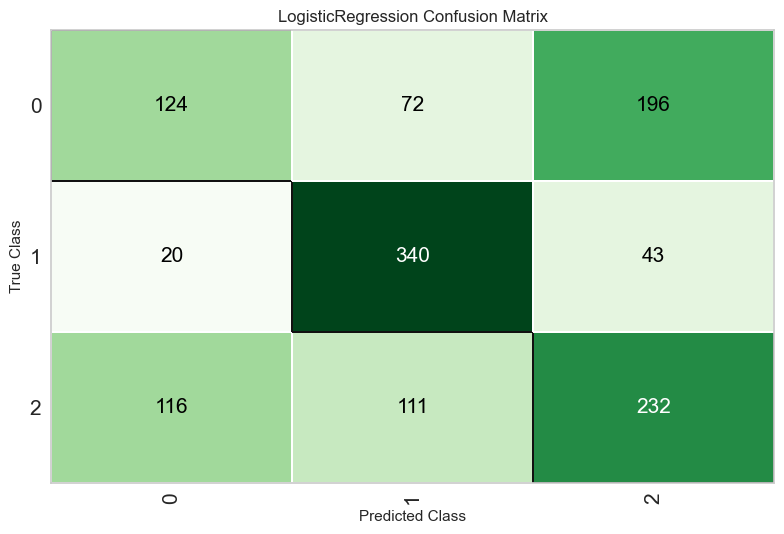

In [21]:
plot_model(final_model, plot='confusion_matrix')

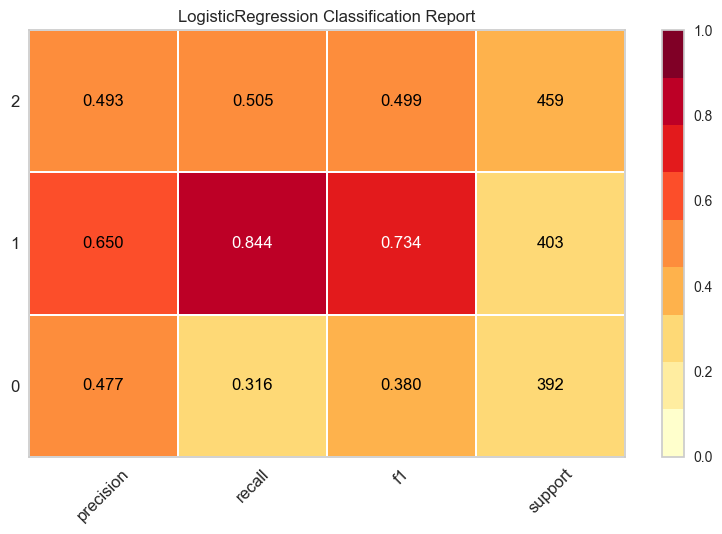

In [22]:
plot_model(final_model, plot='class_report')

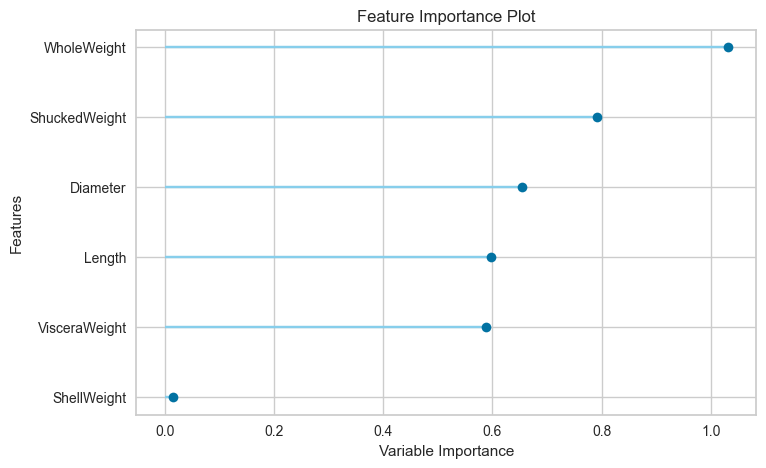

In [23]:
plot_model(final_model, plot='feature')


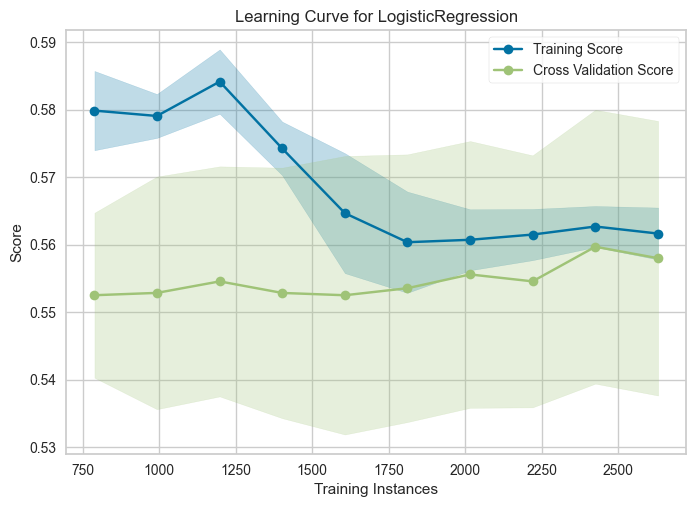

In [24]:
plot_model(final_model, plot='learning')

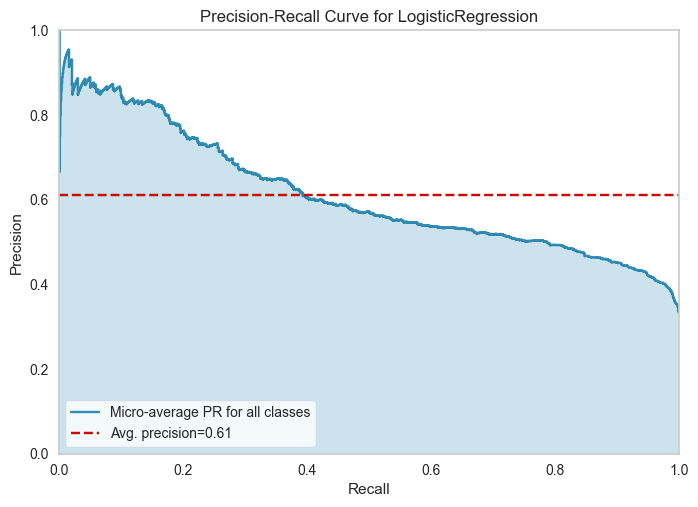

In [25]:
plot_model(final_model, plot='pr')

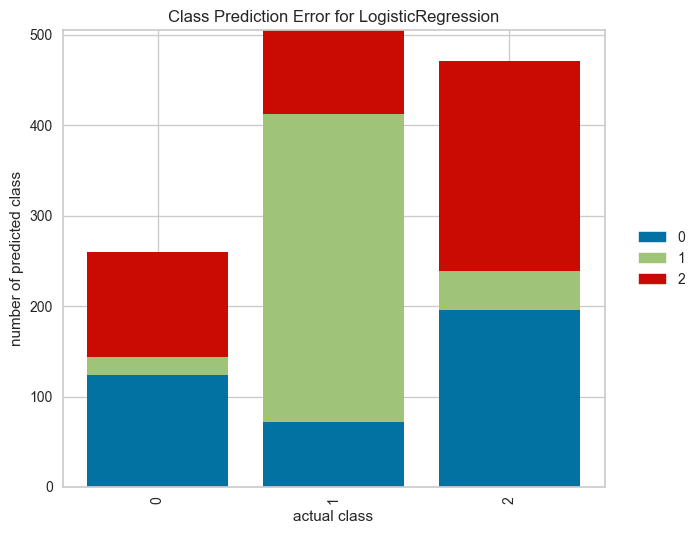

In [26]:
plot_model(final_model, plot='error')

In [27]:
results_compare = pull()
results_compare

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.555,0.755,0.555,0.5383,0.5375,0.3295,0.3347


In [28]:
results_compare.to_csv("model_results.csv", index=False)

## Summary - Abalone Sex Classification

- **Task:** Multiclass classification (predict Sex: M/F/I).
- **Dataset:** 4057 cleaned samples, 7 selected features.
- **Method:** PyCaret automated classification.
- **Best Model:** Logistic Regression (after feature selection).
- **Performance:** Accuracy ≈ 0.56 (expected due to high class overlap).
- **Saved Files:** Final model (.pkl), model comparison table, predictions file, and all evaluation plots.